In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [36]:
modelname = 'xgb_trans_07:22:39_4_GSM4041595_K562_rep2.hg38_250_1'
experiments = ['GSM4041591_K562_rep1_add.hg38', 'GSM4041593_K562_rep1.hg38', 'GSM4041595_K562_rep2.hg38']

In [37]:
tables = []
for i in experiments:
    tables.append(pd.read_csv(f'/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/parsed_contacts_{i}/predict_{modelname}.tsv', sep = '\t', header = None))
all_preds = pd.concat(tables)

In [38]:
all_preds

,0,1,2
0,D00795:28:C99BVACXX:7:1109:4589:2177,0.972965,0.027035
1,D00795:28:C99BVACXX:7:1109:5386:2217,0.998373,0.001627
2,D00795:28:C99BVACXX:7:1109:13160:2180,0.992028,0.007972
3,D00795:28:C99BVACXX:7:1109:16538:2151,0.958483,0.041517
4,D00795:28:C99BVACXX:7:1109:19887:2032,0.976575,0.023425
...,...,...,...
22116307,D00795:30:CA2UTANXX:5:1206:11849:73314,0.858287,0.141713
22116308,D00795:30:CA2UTANXX:5:1206:4802:74688,0.990774,0.009227
22116309,D00795:30:CA2UTANXX:5:2311:1345:9027,0.952059,0.047941
22116310,D00795:30:CA2UTANXX:5:2309:12181:2627,0.906606,0.093394


In [39]:
del tables

In [40]:
id_to_gene = pd.read_csv('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/id_to_gene_gene.tsv', sep = '\t', header = None)

In [41]:
id_to_gene

,0,1,2,3,4,5,6
0,chr5,D00795:28:C99BVACXX:7:1109:11819:1988,18965861,19142346,AC106744.1,lncRNA,ENSG00000249174.1
1,chr7,D00795:28:C99BVACXX:7:1109:13986:1984,110662644,111562517,IMMP2L,protein_coding,ENSG00000184903.10
2,chr9,D00795:28:C99BVACXX:7:1109:16106:1964,132375548,132406851,TTF1,protein_coding,ENSG00000125482.13
3,chr5,D00795:28:C99BVACXX:7:1109:1515:2204,97160867,97183247,RIOK2,protein_coding,ENSG00000058729.11
4,chr9,D00795:28:C99BVACXX:7:1109:1826:2089,1980290,2193624,SMARCA2,protein_coding,ENSG00000080503.24
...,...,...,...,...,...,...,...
37395733,chr7,D00795:30:CA2UTANXX:5:2313:3581:4843,139339457,139346328,FMC1,protein_coding,ENSG00000164898.13
37395734,chr7,D00795:30:CA2UTANXX:5:2313:3581:4843,139340359,139423457,LUC7L2,protein_coding,ENSG00000146963.18
37395735,chr5,D00795:30:CA2UTANXX:5:2313:4074:4795,6599239,6633291,NSUN2,protein_coding,ENSG00000037474.15
37395736,chr1,D00795:30:CA2UTANXX:5:2313:4066:4899,88684222,88836255,PKN2,protein_coding,ENSG00000065243.20


In [42]:
all_con = pd.merge(left=id_to_gene[[1, 4, 5, 6]], right=all_preds, left_on=1, right_on=0, how ='inner')

In [43]:
all_con

,1,1_x,4,5,6,0,1_y,2
0,D00795:28:C99BVACXX:7:1109:11819:1988,D00795:28:C99BVACXX:7:1109:11819:1988,AC106744.1,lncRNA,ENSG00000249174.1,D00795:28:C99BVACXX:7:1109:11819:1988,0.990383,0.009617
1,D00795:28:C99BVACXX:7:1109:13986:1984,D00795:28:C99BVACXX:7:1109:13986:1984,IMMP2L,protein_coding,ENSG00000184903.10,D00795:28:C99BVACXX:7:1109:13986:1984,0.961008,0.038992
2,D00795:28:C99BVACXX:7:1109:16106:1964,D00795:28:C99BVACXX:7:1109:16106:1964,TTF1,protein_coding,ENSG00000125482.13,D00795:28:C99BVACXX:7:1109:16106:1964,0.956739,0.043261
3,D00795:28:C99BVACXX:7:1109:1515:2204,D00795:28:C99BVACXX:7:1109:1515:2204,RIOK2,protein_coding,ENSG00000058729.11,D00795:28:C99BVACXX:7:1109:1515:2204,0.996900,0.003100
4,D00795:28:C99BVACXX:7:1109:1826:2089,D00795:28:C99BVACXX:7:1109:1826:2089,SMARCA2,protein_coding,ENSG00000080503.24,D00795:28:C99BVACXX:7:1109:1826:2089,0.971431,0.028569
...,...,...,...,...,...,...,...,...
37395664,D00795:30:CA2UTANXX:5:2313:3581:4843,D00795:30:CA2UTANXX:5:2313:3581:4843,FMC1,protein_coding,ENSG00000164898.13,D00795:30:CA2UTANXX:5:2313:3581:4843,0.988054,0.011946
37395665,D00795:30:CA2UTANXX:5:2313:3581:4843,D00795:30:CA2UTANXX:5:2313:3581:4843,LUC7L2,protein_coding,ENSG00000146963.18,D00795:30:CA2UTANXX:5:2313:3581:4843,0.988054,0.011946
37395666,D00795:30:CA2UTANXX:5:2313:4074:4795,D00795:30:CA2UTANXX:5:2313:4074:4795,NSUN2,protein_coding,ENSG00000037474.15,D00795:30:CA2UTANXX:5:2313:4074:4795,0.998329,0.001672
37395667,D00795:30:CA2UTANXX:5:2313:4066:4899,D00795:30:CA2UTANXX:5:2313:4066:4899,PKN2,protein_coding,ENSG00000065243.20,D00795:30:CA2UTANXX:5:2313:4066:4899,0.981730,0.018270


In [44]:
del id_to_gene
del all_preds

In [45]:
all_con = all_con.rename(columns={1:'id', 4:'name', 5: 'type', 6:'ac', '1_y':'positive', 2:'negative'})
all_con.pop('1_x')

0           D00795:28:C99BVACXX:7:1109:11819:1988
1           D00795:28:C99BVACXX:7:1109:13986:1984
2           D00795:28:C99BVACXX:7:1109:16106:1964
3            D00795:28:C99BVACXX:7:1109:1515:2204
4            D00795:28:C99BVACXX:7:1109:1826:2089
                            ...                  
37395664     D00795:30:CA2UTANXX:5:2313:3581:4843
37395665     D00795:30:CA2UTANXX:5:2313:3581:4843
37395666     D00795:30:CA2UTANXX:5:2313:4074:4795
37395667     D00795:30:CA2UTANXX:5:2313:4066:4899
37395668     D00795:30:CA2UTANXX:5:2313:4214:4948
Name: 1_x, Length: 37395669, dtype: object

In [46]:
all_con

,id,name,type,ac,0,positive,negative
0,D00795:28:C99BVACXX:7:1109:11819:1988,AC106744.1,lncRNA,ENSG00000249174.1,D00795:28:C99BVACXX:7:1109:11819:1988,0.990383,0.009617
1,D00795:28:C99BVACXX:7:1109:13986:1984,IMMP2L,protein_coding,ENSG00000184903.10,D00795:28:C99BVACXX:7:1109:13986:1984,0.961008,0.038992
2,D00795:28:C99BVACXX:7:1109:16106:1964,TTF1,protein_coding,ENSG00000125482.13,D00795:28:C99BVACXX:7:1109:16106:1964,0.956739,0.043261
3,D00795:28:C99BVACXX:7:1109:1515:2204,RIOK2,protein_coding,ENSG00000058729.11,D00795:28:C99BVACXX:7:1109:1515:2204,0.996900,0.003100
4,D00795:28:C99BVACXX:7:1109:1826:2089,SMARCA2,protein_coding,ENSG00000080503.24,D00795:28:C99BVACXX:7:1109:1826:2089,0.971431,0.028569
...,...,...,...,...,...,...,...
37395664,D00795:30:CA2UTANXX:5:2313:3581:4843,FMC1,protein_coding,ENSG00000164898.13,D00795:30:CA2UTANXX:5:2313:3581:4843,0.988054,0.011946
37395665,D00795:30:CA2UTANXX:5:2313:3581:4843,LUC7L2,protein_coding,ENSG00000146963.18,D00795:30:CA2UTANXX:5:2313:3581:4843,0.988054,0.011946
37395666,D00795:30:CA2UTANXX:5:2313:4074:4795,NSUN2,protein_coding,ENSG00000037474.15,D00795:30:CA2UTANXX:5:2313:4074:4795,0.998329,0.001672
37395667,D00795:30:CA2UTANXX:5:2313:4066:4899,PKN2,protein_coding,ENSG00000065243.20,D00795:30:CA2UTANXX:5:2313:4066:4899,0.981730,0.018270


In [47]:
all_con['positive'] = all_con['positive'].parallel_apply(lambda x: 1 if x>=0.5 else 0)
all_con['negative'] = all_con['negative'].parallel_apply(lambda x: 1 if x>=0.5 else 0)

In [48]:
all_con

,id,name,type,ac,0,positive,negative
0,D00795:28:C99BVACXX:7:1109:11819:1988,AC106744.1,lncRNA,ENSG00000249174.1,D00795:28:C99BVACXX:7:1109:11819:1988,1,0
1,D00795:28:C99BVACXX:7:1109:13986:1984,IMMP2L,protein_coding,ENSG00000184903.10,D00795:28:C99BVACXX:7:1109:13986:1984,1,0
2,D00795:28:C99BVACXX:7:1109:16106:1964,TTF1,protein_coding,ENSG00000125482.13,D00795:28:C99BVACXX:7:1109:16106:1964,1,0
3,D00795:28:C99BVACXX:7:1109:1515:2204,RIOK2,protein_coding,ENSG00000058729.11,D00795:28:C99BVACXX:7:1109:1515:2204,1,0
4,D00795:28:C99BVACXX:7:1109:1826:2089,SMARCA2,protein_coding,ENSG00000080503.24,D00795:28:C99BVACXX:7:1109:1826:2089,1,0
...,...,...,...,...,...,...,...
37395664,D00795:30:CA2UTANXX:5:2313:3581:4843,FMC1,protein_coding,ENSG00000164898.13,D00795:30:CA2UTANXX:5:2313:3581:4843,1,0
37395665,D00795:30:CA2UTANXX:5:2313:3581:4843,LUC7L2,protein_coding,ENSG00000146963.18,D00795:30:CA2UTANXX:5:2313:3581:4843,1,0
37395666,D00795:30:CA2UTANXX:5:2313:4074:4795,NSUN2,protein_coding,ENSG00000037474.15,D00795:30:CA2UTANXX:5:2313:4074:4795,1,0
37395667,D00795:30:CA2UTANXX:5:2313:4066:4899,PKN2,protein_coding,ENSG00000065243.20,D00795:30:CA2UTANXX:5:2313:4066:4899,1,0


In [49]:
all_con[all_con['negative']==1]

,id,name,type,ac,0,positive,negative
119,D00795:28:C99BVACXX:7:1109:10946:2968,ASCC3,protein_coding,ENSG00000112249.14,D00795:28:C99BVACXX:7:1109:10946:2968,0,1
121,D00795:28:C99BVACXX:7:1109:11836:2926,MRPS5,protein_coding,ENSG00000144029.12,D00795:28:C99BVACXX:7:1109:11836:2926,0,1
1196,D00795:28:C99BVACXX:7:1109:11550:11789,MECOM,protein_coding,ENSG00000085276.19,D00795:28:C99BVACXX:7:1109:11550:11789,0,1
1206,D00795:28:C99BVACXX:7:1109:3675:12200,LSM14B,protein_coding,ENSG00000149657.20,D00795:28:C99BVACXX:7:1109:3675:12200,0,1
1723,D00795:28:C99BVACXX:7:1109:5605:16602,EIF3H,protein_coding,ENSG00000147677.11,D00795:28:C99BVACXX:7:1109:5605:16602,0,1
...,...,...,...,...,...,...,...
37393443,D00795:30:CA2UTANXX:5:2316:6437:101108,TRMT44,protein_coding,ENSG00000155275.19,D00795:30:CA2UTANXX:5:2316:6437:101108,0,1
37394250,D00795:30:CA2UTANXX:5:2313:7643:2840,AC007731.4,protein_coding,ENSG00000277971.1,D00795:30:CA2UTANXX:5:2313:7643:2840,0,1
37394264,D00795:30:CA2UTANXX:5:2313:9593:2812,KRT7,protein_coding,ENSG00000135480.16,D00795:30:CA2UTANXX:5:2313:9593:2812,0,1
37394664,D00795:30:CA2UTANXX:5:2313:13284:3361,KIF15,protein_coding,ENSG00000163808.17,D00795:30:CA2UTANXX:5:2313:13284:3361,0,1


In [50]:
counts = all_con[['name', 'ac', 'type', 'negative']].groupby(all_con[['name', 'ac', 'type', 'negative']].columns.tolist()[::]).size()

In [51]:
counts

name       ac                  type             negative
5S_rRNA    ENSG00000285626.1   rRNA_pseudogene  0               1
           ENSG00000285776.1   rRNA_pseudogene  0              20
           ENSG00000288601.1   rRNA_pseudogene  0               2
5_8S_rRNA  ENSG00000275877.1   rRNA             0               4
           ENSG00000283274.1   rRNA             1               1
                                                            ...  
ZZEF1      ENSG00000074755.15  protein_coding   0            4202
                                                1               5
ZZZ3       ENSG00000036549.13  protein_coding   0           13162
                                                1               5
snoZ196    ENSG00000281780.1   snoRNA           0              35
Length: 43303, dtype: int64

In [52]:
counts = pd.DataFrame(counts)

In [53]:
counts.reset_index(inplace=True)

In [54]:
counts

,name,ac,type,negative,0
0,5S_rRNA,ENSG00000285626.1,rRNA_pseudogene,0,1
1,5S_rRNA,ENSG00000285776.1,rRNA_pseudogene,0,20
2,5S_rRNA,ENSG00000288601.1,rRNA_pseudogene,0,2
3,5_8S_rRNA,ENSG00000275877.1,rRNA,0,4
4,5_8S_rRNA,ENSG00000283274.1,rRNA,1,1
...,...,...,...,...,...
43298,ZZEF1,ENSG00000074755.15,protein_coding,0,4202
43299,ZZEF1,ENSG00000074755.15,protein_coding,1,5
43300,ZZZ3,ENSG00000036549.13,protein_coding,0,13162
43301,ZZZ3,ENSG00000036549.13,protein_coding,1,5


In [55]:
counts[counts['negative']==0].sort_values(by=[0]).reset_index(inplace=True)

In [56]:
counts1 = counts[counts['negative']==1]
counts1 = counts1.sort_values(by=[0])
counts1.reset_index(inplace=True)

In [57]:
counts1

,index,name,ac,type,negative,0
0,4,5_8S_rRNA,ENSG00000283274.1,rRNA,1,1
1,12887,BPESC1,ENSG00000232416.3,lncRNA,1,1
2,29011,OAT,ENSG00000065154.12,protein_coding,1,1
3,12895,BPNT1,ENSG00000162813.18,protein_coding,1,1
4,12897,BPNT2,ENSG00000104331.9,protein_coding,1,1
...,...,...,...,...,...,...
10988,12682,BCR,ENSG00000186716.21,protein_coding,1,376
10989,20556,GSE1,ENSG00000131149.19,protein_coding,1,388
10990,4307,AC079466.1,ENSG00000266976.3,lncRNA,1,451
10991,10425,AL713998.1,ENSG00000227706.4,lncRNA,1,655


In [66]:
counts1.loc[10983:10993, :]

,index,name,ac,type,negative,0
10983,32002,PVT1,ENSG00000249859.12,lncRNA,1,316
10984,23937,LINC01169,ENSG00000259471.1,lncRNA,1,319
10985,7682,AHNAK,ENSG00000124942.14,protein_coding,1,330
10986,15286,CMIP,ENSG00000153815.16,protein_coding,1,340
10987,7595,AGAP1,ENSG00000157985.19,protein_coding,1,343
10988,12682,BCR,ENSG00000186716.21,protein_coding,1,376
10989,20556,GSE1,ENSG00000131149.19,protein_coding,1,388
10990,4307,AC079466.1,ENSG00000266976.3,lncRNA,1,451
10991,10425,AL713998.1,ENSG00000227706.4,lncRNA,1,655
10992,13344,C22orf34,ENSG00000188511.12,lncRNA,1,696


In [59]:
types = np.array(counts[counts['negative']==0].sort_values(by=[0])['type'])[-100:]

In [60]:
genes = np.array(counts[counts['negative']==0].sort_values(by=[0])['name'])[-100:]

In [61]:
acs = np.array(counts[counts['negative']==0].sort_values(by=[0])['ac'])[-100:]

In [62]:
top100 = np.concatenate((types[:, np.newaxis], genes[:, np.newaxis], acs[:, np.newaxis]), axis=1)

In [63]:
np.savetxt(f'/home/pitikovegor/CourseWork/genomes/pictures/{modelname}.tsv', top100, delimiter="\t", fmt = '%s')

In [64]:
gene_types = list(set(counts['type']))

In [65]:
means = {}
for i in gene_types:
    spec = counts[(counts['type']==i) & (counts['negative']==1)].loc[:, 0].sum()
    nonspec = counts[(counts['type']==i) & (counts['negative']==0)].loc[:, 0].sum()
    print('%s have %s specific and %s nonspecific contacts' % (i, spec, nonspec))
    means[i] = [nonspec, spec]

rRNA_pseudogene have 0 specific and 569 nonspecific contacts
scRNA have 0 specific and 3 nonspecific contacts
processed_pseudogene have 375 specific and 29999 nonspecific contacts
ribozyme have 0 specific and 20775 nonspecific contacts
snRNA have 1 specific and 218488 nonspecific contacts
TR_V_pseudogene have 0 specific and 1 nonspecific contacts
transcribed_unprocessed_pseudogene have 1035 specific and 196596 nonspecific contacts
misc_RNA have 7 specific and 46378 nonspecific contacts
snoRNA have 266 specific and 308023 nonspecific contacts
transcribed_processed_pseudogene have 662 specific and 221248 nonspecific contacts
unprocessed_pseudogene have 126 specific and 23479 nonspecific contacts
TR_J_pseudogene have 0 specific and 1 nonspecific contacts
TR_J_gene have 0 specific and 10 nonspecific contacts
polymorphic_pseudogene have 0 specific and 330 nonspecific contacts
lncRNA have 15221 specific and 5641768 nonspecific contacts
IG_C_pseudogene have 10 specific and 79 nonspecific cont

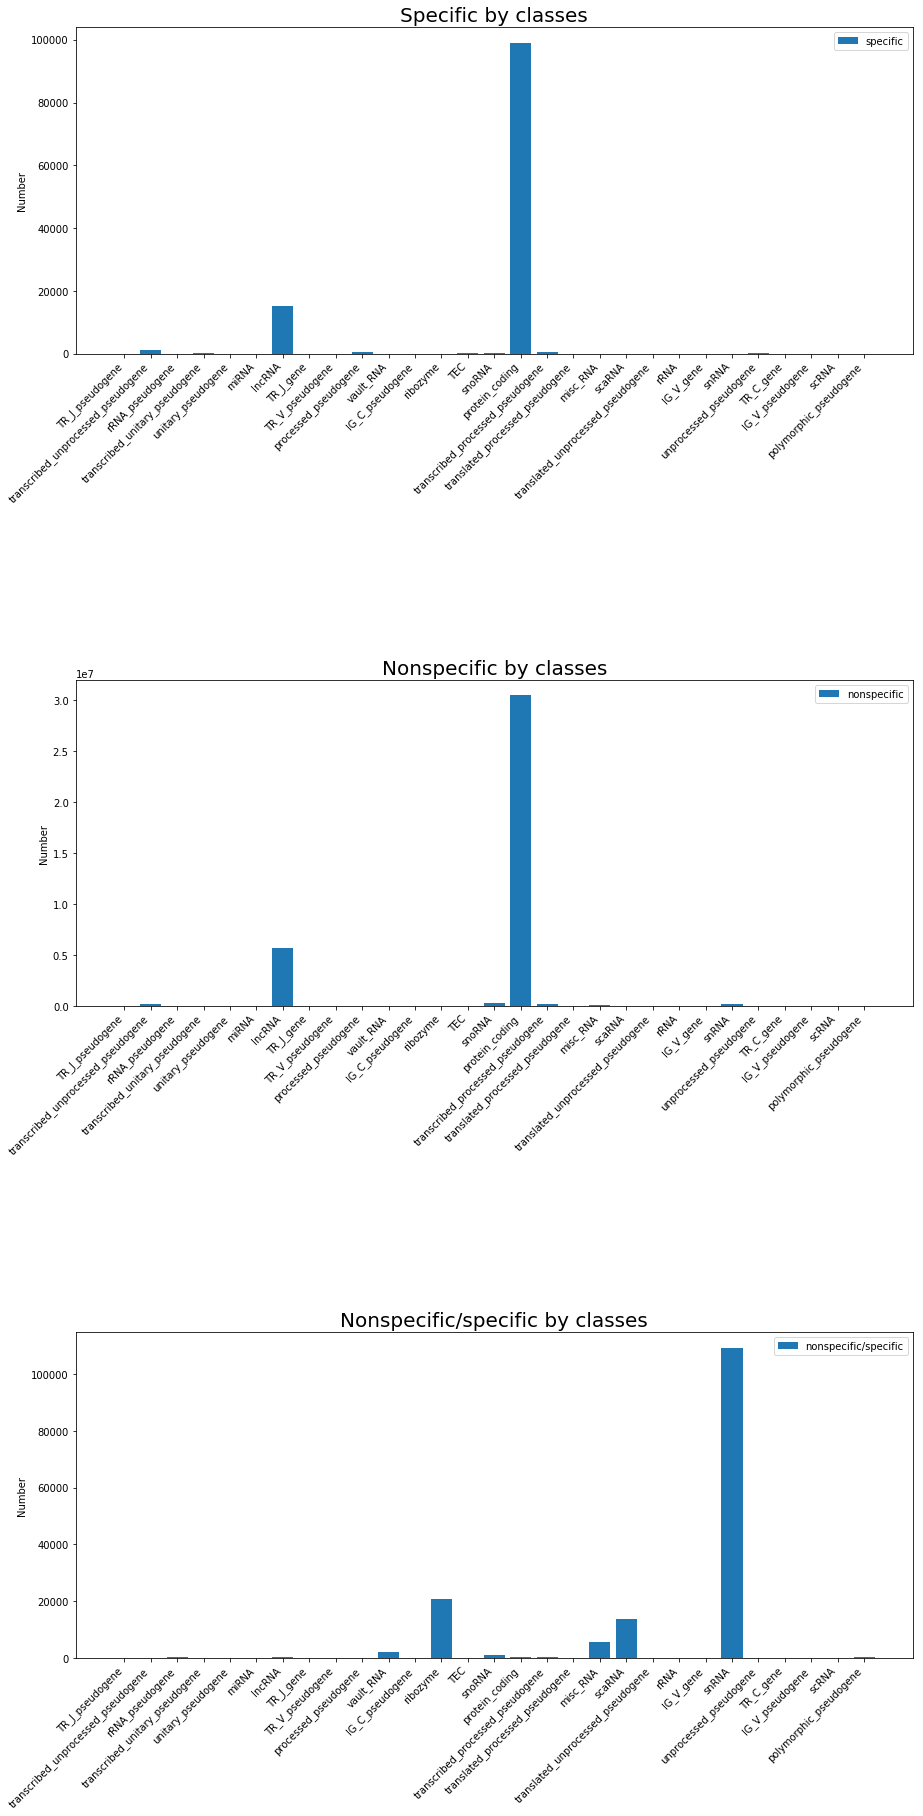

In [100]:
plt.rcParams['axes.titlesize'] = 8
fig = plt.figure(1, figsize=(15, 30))
gs = gridspec.GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, :])
spec = ax0.bar(np.arange(len(means.keys())), [means[i][1] for i in means.keys()], label='specific')
ax0.set_ylabel('Number')
ax0.set_title('Specific by classes', fontsize=20)
ax0.set_xticks(np.arange(len(means.keys()))) 
ax0.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
ax0.legend()
ax1 = fig.add_subplot(gs[1, :])
nonspec = ax1.bar(np.arange(len(means.keys())), [means[i][0] for i in means.keys()], label='nonspecific')
ax1.set_ylabel('Number')
ax1.set_title('Nonspecific by classes', fontsize=20)
ax1.set_xticks(np.arange(len(means.keys())))
ax1.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
ax1.legend()
ax2 = fig.add_subplot(gs[2, :])
nonspec = ax2.bar(np.arange(len(means.keys())), [means[i][0]/(means[i][1]+1) for i in means.keys()], label='nonspecific/specific')
ax2.set_ylabel('Number')
ax2.set_title('Nonspecific/specific by classes', fontsize=20)
ax2.set_xticks(np.arange(len(means.keys())))
ax2.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
ax2.legend()
plt.subplots_adjust(wspace=2, hspace=1)
plt.savefig('/home/pitikovegor/CourseWork/genomes/pictures/Models/%s_coninfo.png' % modelname)
plt.show()